In [1]:
import scipy.stats as stats
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
#import smogn #회귀 문제를 위한 SMOTE 오버 샘플링 기법
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from imblearn.over_sampling import SMOTENC

In [2]:
# 데이터 셋 불러오기 (KS값)
data = pd.read_csv('C:/Users/leewa/Desktop/데이터/인수인계 데이터/원본데이터_both_KS_Avr.csv',encoding='euc-kr')

In [3]:
x = data[['Dorosperse Red KKL', 'Dorosperse Yellow KKL',
       'Dorosperse Blue KKL', 'Dianix Red AM-SLR', 'Dianix Yellow AM-2R',
       'Dianix Blue AM-2G', 'Synolon Red AK', 'Synolon Yellow AK',
       'Synolon Blue AK', 'Dorosperse B/K KKL', 'Dorosperse Dark Grey KKL',
       'Dorosperse Brown K-3LR', 'Dianix Black AM-SLR', 'Dianix Grey AM-SLR',
       'Dianix Yellow Brown AM-R', 'Synolon Black AK-NB',
       'Synolon Dark Grey AK', 'Synofast 28', 'Dorosperse Yellow KKL_prop',
       'Dorosperse Red KKL_prop', 'Dorosperse Blue KKL_prop',
       'Dianix Yellow AM-2R_prop', 'Dianix Red AM-SLR_prop',
       'Dianix Blue AM-2G_prop', 'Synolon Yellow AK_prop',
       'Synolon Red AK_prop', 'Synolon Blue AK_prop',
       'Dorosperse B/K KKL_prop', 'Dianix Black AM-SLR_prop',
       'Synolon Black AK-NB_prop', 'Dorosperse Dark Grey KKL_prop',
       'Dianix Grey AM-SLR_prop', 'Synolon Dark Grey AK_prop',
       'Dianix Yellow Brown AM-R_prop', 'Dorosperse Brown K-3LR_prop',
       'Synofast 28_prop', '배합_Sunsolt RM-340S', '배합_빙초산', '배합_Fadex® TS liq',
       '배합_Sera Fast P-UVC', '배합_UVK-400 H/C', 'Lab 염색 시작온도', 'Lab 염색 상승속도 #1',
       'Lab 염색 상승온도 #1', 'Lab 염색 상승온도 #1 유지시간', 'Lab 염색 상승속도 #2',
       'Lab 염색 상승온도 #2', 'Lab 염색 상승온도 #2 유지시간', 'Lab 염색 상승속도 #3',
       'Lab 염색 상승온도 #3', 'Lab 염색 상승온도 #3 유지시간', 'Lab 염색 하강속도 #1',
       'Lab 염색 하강온도 #1', 'Lab 염색 하강온도 #1 유지시간', 'Lab 염색 하강속도 #2',
       'Lab 염색 하강온도 #2', 'Lab 염색 하강온도 #2 유지시간', 'Lab 염색 하강속도 #3',
       'Lab 염색 하강온도 #3', 'Lab 염색 하강온도 #3 유지시간', 'Lab 염색 종료속도', 'Lab 염색 종료온도',
       'Lab 염색 종료온도 유지시간']]
y = data[['잔욕염색 검사_K/S']]
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=42)

In [4]:
# lightgbm을 구현하여 shap value를 예측할 것
# ligthgbm 구현

# library
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

C:\Users\leewa\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 1267, number of used features: 44
[LightGBM] [Info] Start training from score 0.958728
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [5]:
# shap value를 이용하여 각 변수의 영향도 파악

# !pip install shap (에러 발생시, skimage version 확인 (0.14.2 이상 권장))
# import skimage -> skimage.__version__ (skimage version 확인)
# skimage version upgrade -> !pip install --upgrade scikit-image

# shap value 
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

In [6]:
# version 확인
import skimage
skimage.__version__

'0.19.2'

Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
Glyph 49549 (\N{HANG

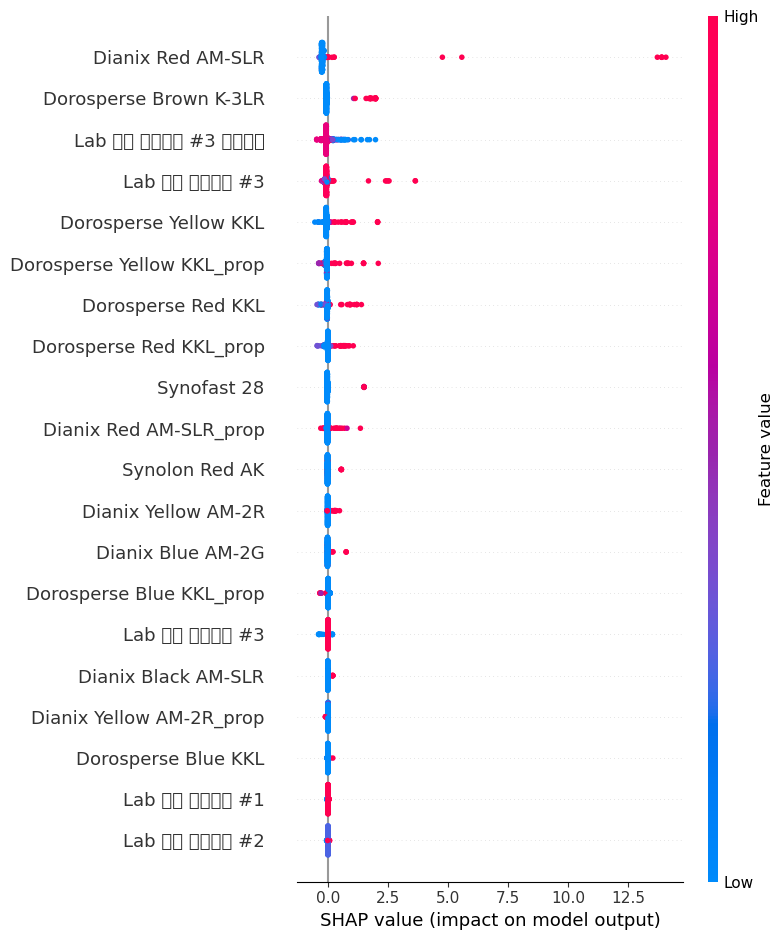

In [7]:
# summary
shap.summary_plot(shap_values, test_x)

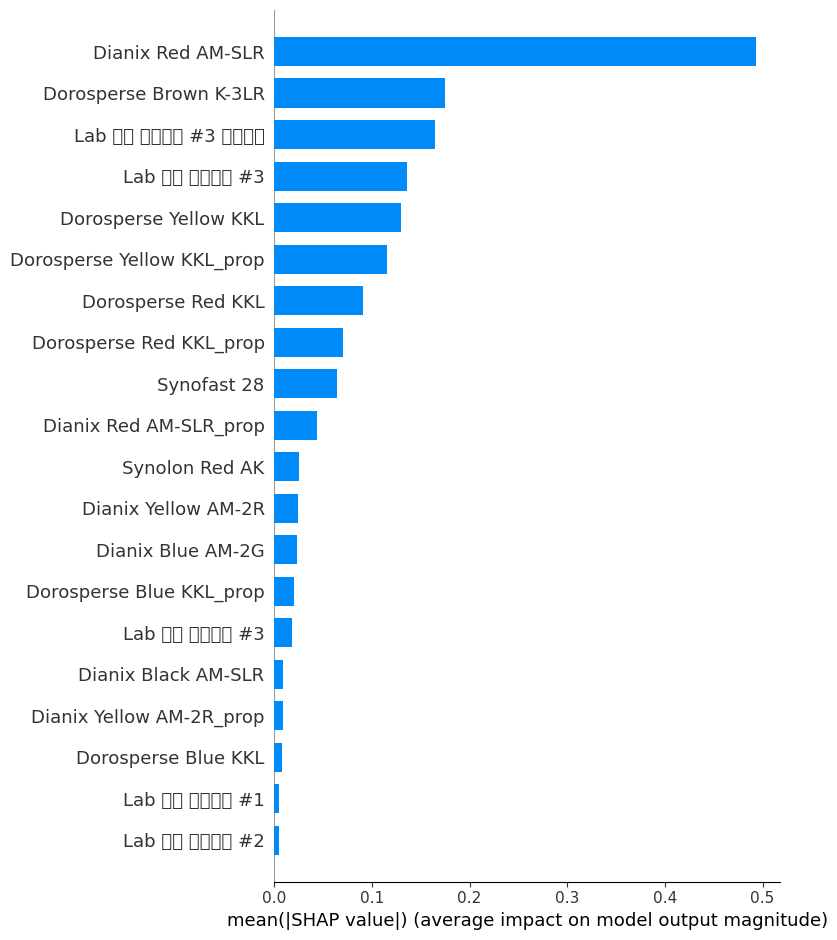

In [8]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_x, plot_type = "bar")

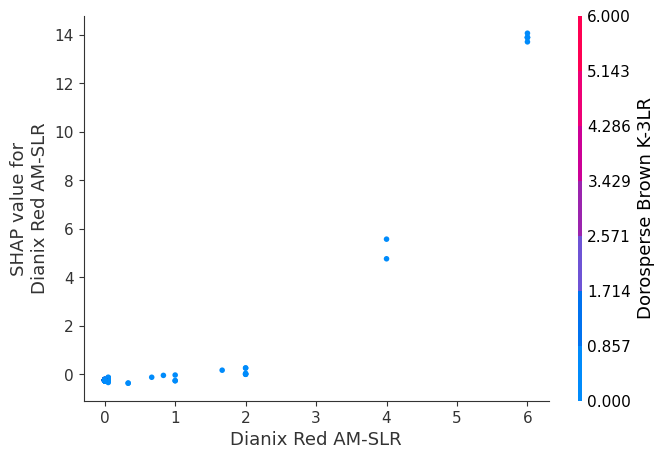

In [13]:
 # 변수 간의 shap value 파악
shap.dependence_plot("Dianix Red AM-SLR", shap_values, test_x)